# Описание переменных

| Название поля                     | Описание                                                                                                                                  |
|------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| **order_rk**                       | Идентификатор заказа (поездки)                                                                                                           |
| **party_rk_id**                    | Идентификатор клиента                                                                                                                   |
| **minute_cost**                    | Стоимость минуты                                                                                                                        |
| **hold_amount**                    | Размер суммы, которая замораживается на счете в момент взятия самоката                                                                   |
| **transport_model**                | Название модели самоката                                                                                                                 |
| **distance_km**                    | Километраж поездки                                                                                                                      |
| **created_dttm**                   | Дата и время создания заказа                                                                                                             |
| **book_start_dttm**                | Дата и время начала поездки                                                                                                              |
| **book_end_dttm**                  | Дата и время завершения поездки                                                                                                          |
| **book_time_zone_cd**              | Часовой пояс                                                                                                                             |
| **local_book_start_dttm**          | Дата и время начала поездки в часовом поясе человека, который брал самокат                                                              |
| **nominal_price_rub_amt**          | Стоимость поездки                                                                                                                        |
| **loyalty_accrual_rub_amt**        | Размер выплаченного кэшбэка в рублях                                                                                                     |
| **loyalty_accrual_bns_amt**        | Размер выплаченного кэшбэка в бонусах (если оплата происходила с помощью кредитной карты)                                                 |
| **Gender_cd**                      | Пол клиента                                                                                                                              |
| **Age**                            | Возраст клиента                                                                                                                         |
| **Education_level**                | Уровень образования клиента: SCH — начальное, среднее, GRD — высшее, UGR — неполное высшее, PGR — два высших, ACD — ученая степень      |
| **lvn_state_nm**                   | Регион проживания человека                                                                                                               |
| **marital_status_cd**              | Семейный статус человека: IMR — состоит в незарегистрированном браке, MAR —женат/замужем, DLW — не проживает с супругом(ой), OMR — состоит в зарегистрированном браке, CIV — гражданский брак, UNM — холост/не замужем, DIV — разведен(а), FAL — никогда не состоял(а) в браке, WID — вдовец/вдова |


In [1]:
import pingouin as pg
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kicksharing.csv', parse_dates=(['created_dttm','book_start_dttm','book_end_dttm','local_book_start_dttm']))

In [3]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


### Очистка, обработка, изучение и преобразование данных

In [4]:
df.dtypes

order_rk                            int64
party_rk                            int64
gender_cd                          object
age                                 int64
education_level_cd                 object
marital_status_cd                  object
lvn_state_nm                       object
minute_cost                       float64
activation_cost                   float64
hold_amount                       float64
transport_model                    object
distance_km                       float64
created_dttm               datetime64[ns]
book_start_dttm            datetime64[ns]
book_end_dttm              datetime64[ns]
book_time_zone_cd                   int64
local_book_start_dttm      datetime64[ns]
nominal_price_rub_amt             float64
loyalty_accrual_rub_amt           float64
loyalty_accrual_bns_amt           float64
dtype: object

In [5]:
df.shape

(396749, 20)

In [6]:
df.isna().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

In [7]:
df.duplicated(subset='order_rk').sum()

0

Всего 396749 строк, дубликатов нет \
Пропуски: 
| Переменная                          | Количество пропусков | Описание                                            | Тип переменной               |
|-------------------------------------|------------|-----------------------------------------------------|------------------------------|
| gender_cd                           | 2921       | Пол клиента                                        | качественная переменная      |
| education_level_cd                  | 206690     | Образование                                        | качественная переменная      |
| marital_status_cd              | 179020 |Семейный статус человека: IMR — состоит в незарегистрированном браке, MAR —женат/замужем, DLW — не проживает с супругом(ой), OMR — состоит в зарегистрированном браке, CIV — гражданский брак, UNM — холост/не замужем, DIV — разведен(а), FAL — никогда не состоял(а) в браке, WID — вдовец/вдова | качественная переменна
| lvn_state_nm                        | 34177      | Регион проживания человека                         | качественная переменная      |
| loyalty_accrual_rub_amt             | 29757      | Размер выплаченного кэшбэка в рублях                | количественная переменная    |
| loyalty_accrual_bns_amt             | 374801     | Размер выплаченного кэшбэка в бонусах (если оплата происходила с помощью кредитной карты) | количественная переменная    |


Обработка пропусков:
1. В данном случае пропуски в качественных перменных заменем на "Не указано"
2. Пропуски в столбцах loyalty_accrual_rub_amt, loyalty_accrual_bns_amt	обозначают отсутствие кэшбэка и будут заменены на 0

In [8]:
nominative_columns = ['gender_cd', 'education_level_cd', 'marital_status_cd', 'lvn_state_nm']

In [9]:
for col in nominative_columns:
    df[col] = df[col].fillna('Не указано')

In [10]:
quantitative_сolumns = ['loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']

In [11]:
for col in quantitative_сolumns:
    df[col] = df[col].fillna(0)

In [12]:
df.isna().sum()

order_rk                   0
party_rk                   0
gender_cd                  0
age                        0
education_level_cd         0
marital_status_cd          0
lvn_state_nm               0
minute_cost                0
activation_cost            0
hold_amount                0
transport_model            0
distance_km                0
created_dttm               0
book_start_dttm            0
book_end_dttm              0
book_time_zone_cd          0
local_book_start_dttm      0
nominal_price_rub_amt      0
loyalty_accrual_rub_amt    0
loyalty_accrual_bns_amt    0
dtype: int64

In [13]:
df['lvn_state_nm'].nunique()

213

In [14]:
df['lvn_state_nm'].unique()

array(['ТЮМЕНСКАЯ ОБЛ', 'РОСТОВСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛ', 'Г МОСКВА',
       'МОСКВА', 'РЕСП ТАТАРСТАН', 'НОВОСИБИРСКАЯ ОБЛ', 'ЧЕЛЯБИНСКАЯ ОБЛ',
       'Не указано', 'НИЖЕГОРОДСКАЯ ОБЛ', 'КРАСНОДАРСКИЙ КРАЙ',
       'МОСКОВСКАЯ ОБЛ', 'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС',
       'КРАСНОЯРСКИЙ КРАЙ', 'СМОЛЕНСКАЯ ОБЛ', 'ИРКУТСКАЯ ОБЛ',
       'ОРЛОВСКАЯ ОБЛ', 'Г САНКТ-ПЕТЕРБУРГ', 'РЕСП БАШКОРТОСТАН',
       'ПСКОВСКАЯ ОБЛ', 'ВОЛОГОДСКАЯ ОБЛ', 'РЕСП МАРИЙ ЭЛ',
       'ВОРОНЕЖСКАЯ ОБЛ', 'САМАРСКАЯ ОБЛ', 'АСТРАХАНСКАЯ ОБЛ',
       'БЕЛГОРОДСКАЯ ОБЛ', 'АЛТАЙСКИЙ КРАЙ', 'ЛИПЕЦКАЯ ОБЛ',
       'САРАТОВСКАЯ ОБЛ', 'ЛЕНИНГРАДСКАЯ ОБЛ', 'ПЕРМСКИЙ КРАЙ',
       'САХАЛИНСКАЯ ОБЛ', 'РЕСП УДМУРТСКАЯ', 'РЕСП КРЫМ',
       'КАЛИНИНГРАДСКАЯ ОБЛ', 'ТВЕРСКАЯ ОБЛ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ', 'УДМУРТСКАЯ РЕСП',
       'ИВАНОВСКАЯ ОБЛ', 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО',
       'ПРИМОРСКИЙ КРАЙ', 'ВОЛГОГРАДСКАЯ ОБЛ', 'Г СЕВАСТОПОЛЬ',
       'ТОМСКАЯ ОБЛ', 'РЕСП ЧЕ

lvn_state_nm содержит различные написание одних и тех же регионов. Приведем все записи к одной форме. \
Создадим словарь для стандартизации значений(выполнено совместно с нейросетью) 

In [15]:
region_replacements = {
    'ГОРОД МОСКВА': 'МОСКВА',
    'ТЮМЕНСКАЯ ОБЛ': 'ТЮМЕНСКАЯ ОБЛАСТЬ',
    'РОСТОВСКАЯ ОБЛ': 'РОСТОВСКАЯ ОБЛАСТЬ',
    'СВЕРДЛОВСКАЯ ОБЛ': 'СВЕРДЛОВСКАЯ ОБЛАСТЬ',
    'Г МОСКВА': 'МОСКВА',
    'МОСКВА': 'МОСКВА',
    'РЕСП ТАТАРСТАН': 'ТАТАРСТАН',
    'НОВОСИБИРСКАЯ ОБЛ': 'НОВОСИБИРСКАЯ ОБЛАСТЬ',
    'ЧЕЛЯБИНСКАЯ ОБЛ': 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ',
    'Не указано': 'Не указано',
    'НИЖЕГОРОДСКАЯ ОБЛ': 'НИЖЕГОРОДСКАЯ ОБЛАСТЬ',
    'КРАСНОДАРСКИЙ КРАЙ': 'КРАСНОДАРСКИЙ КРАЙ',
    'МОСКОВСКАЯ ОБЛ': 'МОСКОВСКАЯ ОБЛАСТЬ',
    'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС': 'КЕМЕРОВСКАЯ ОБЛАСТЬ',
    'КРАСНОЯРСКИЙ КРАЙ': 'КРАСНОЯРСКИЙ КРАЙ',
    'СМОЛЕНСКАЯ ОБЛ': 'СМОЛЕНСКАЯ ОБЛАСТЬ',
    'ИРКУТСКАЯ ОБЛ': 'ИРКУТСКАЯ ОБЛАСТЬ',
    'ОРЛОВСКАЯ ОБЛ': 'ОРЛОВСКАЯ ОБЛАСТЬ',
    'Г САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ',
    'РЕСП БАШКОРТОСТАН': 'БАШКОРТОСТАН',
    'ПСКОВСКАЯ ОБЛ': 'ПСКОВСКАЯ ОБЛАСТЬ',
    'ВОЛОГОДСКАЯ ОБЛ': 'ВОЛОГОДСКАЯ ОБЛАСТЬ',
    'РЕСП МАРИЙ ЭЛ': 'МАРИЙ ЭЛ',
    'ВОРОНЕЖСКАЯ ОБЛ': 'ВОРОНЕЖСКАЯ ОБЛАСТЬ',
    'САМАРСКАЯ ОБЛ': 'САМАРСКАЯ ОБЛАСТЬ',
    'АСТРАХАНСКАЯ ОБЛ': 'АСТРАХАНСКАЯ ОБЛАСТЬ',
    'БЕЛГОРОДСКАЯ ОБЛ': 'БЕЛГОРОДСКАЯ ОБЛАСТЬ',
    'АЛТАЙСКИЙ КРАЙ': 'АЛТАЙСКИЙ КРАЙ',
    'ЛИПЕЦКАЯ ОБЛ': 'ЛИПЕЦКАЯ ОБЛАСТЬ',
    'САРАТОВСКАЯ ОБЛ': 'САРАТОВСКАЯ ОБЛАСТЬ',
    'ЛЕНИНГРАДСКАЯ ОБЛ': 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ',
    'ПЕРМСКИЙ КРАЙ': 'ПЕРМСКИЙ КРАЙ',
    'САХАЛИНСКАЯ ОБЛ': 'САХАЛИНСКАЯ ОБЛАСТЬ',
    'РЕСП УДМУРТСКАЯ': 'УДМУРТИЯ',
    'РЕСП КРЫМ': 'КРЫМ',
    'КАЛИНИНГРАДСКАЯ ОБЛ': 'КАЛИНИНГРАДСКАЯ ОБЛАСТЬ',
    'ТВЕРСКАЯ ОБЛ': 'ТВЕРСКАЯ ОБЛАСТЬ',
    'СТАВРОПОЛЬСКИЙ КРАЙ': 'СТАВРОПОЛЬСКИЙ КРАЙ',
    'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ': 'СЕВЕРНАЯ ОСЕТИЯ',
    'УДМУРТСКАЯ РЕСП': 'УДМУРТИЯ',
    'ИВАНОВСКАЯ ОБЛ': 'ИВАНОВСКАЯ ОБЛАСТЬ',
    'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО': 'ХАНТЫ-МАНСИЙСКИЙ АО',
    'ПРИМОРСКИЙ КРАЙ': 'ПРИМОРСКИЙ КРАЙ',
    'ВОЛГОГРАДСКАЯ ОБЛ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ',
    'Г СЕВАСТОПОЛЬ': 'СЕВАСТОПОЛЬ',
    'ТОМСКАЯ ОБЛ': 'ТОМСКАЯ ОБЛАСТЬ',
    'РЕСП ЧЕЧЕНСКАЯ': 'ЧЕЧНЯ',
    'САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ',
    'РЕСП БУРЯТИЯ': 'БУРЯТИЯ',
    'РЕСП ДАГЕСТАН': 'ДАГЕСТАН',
    'КУРГАНСКАЯ ОБЛ': 'КУРГАНСКАЯ ОБЛАСТЬ',
    'РЕСП КАБАРДИНО-БАЛКАРСКАЯ': 'КАБАРДИНО-БАЛКАРИЯ',
    'КИРОВСКАЯ ОБЛ': 'КИРОВСКАЯ ОБЛАСТЬ',
    'ЯМАЛО-НЕНЕЦКИЙ АО': 'ЯМАЛО-НЕНЕЦКИЙ АО',
    'ТАМБОВСКАЯ ОБЛ': 'ТАМБОВСКАЯ ОБЛАСТЬ',
    'КУРСКАЯ ОБЛ': 'КУРСКАЯ ОБЛАСТЬ',
    'ОРЕНБУРГСКАЯ ОБЛ': 'ОРЕНБУРГСКАЯ ОБЛАСТЬ',
    'ЯРОСЛАВСКАЯ ОБЛ': 'ЯРОСЛАВСКАЯ ОБЛАСТЬ',
    'БРЯНСКАЯ ОБЛ': 'БРЯНСКАЯ ОБЛАСТЬ',
    'ОБЛ САРАТОВСКАЯ': 'САРАТОВСКАЯ ОБЛАСТЬ',
    'РЯЗАНСКАЯ ОБЛ': 'РЯЗАНСКАЯ ОБЛАСТЬ',
    'ОМСКАЯ ОБЛ': 'ОМСКАЯ ОБЛАСТЬ',
    'РЕСП КОМИ': 'КОМИ',
    'ОБЛ МОСКОВСКАЯ': 'МОСКОВСКАЯ ОБЛАСТЬ',
    'АРХАНГЕЛЬСКАЯ ОБЛ': 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ',
    'ПЕНЗЕНСКАЯ ОБЛ': 'ПЕНЗЕНСКАЯ ОБЛАСТЬ',
    'НОВГОРОДСКАЯ ОБЛ': 'НОВГОРОДСКАЯ ОБЛАСТЬ',
    'ВЛАДИМИРСКАЯ ОБЛ': 'ВЛАДИМИРСКАЯ ОБЛАСТЬ',
    'ТУЛЬСКАЯ ОБЛ': 'ТУЛЬСКАЯ ОБЛАСТЬ',
    'АМУРСКАЯ ОБЛ': 'АМУРСКАЯ ОБЛАСТЬ',
    'ХАБАРОВСКИЙ КРАЙ': 'ХАБАРОВСКИЙ КРАЙ',
    'Г. САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ',
    'КАЛУЖСКАЯ ОБЛ': 'КАЛУЖСКАЯ ОБЛАСТЬ',
    'УЛЬЯНОВСКАЯ ОБЛ': 'УЛЬЯНОВСКАЯ ОБЛАСТЬ',
    'РЕСП САХА /ЯКУТИЯ/': 'САХА /ЯКУТИЯ/',
    'РЕСП КАЛМЫКИЯ': 'КАЛМЫКИЯ',
    'МУРМАНСКАЯ ОБЛ': 'МУРМАНСКАЯ ОБЛАСТЬ',
    'ОБЛ КАЛИНИНГРАДСКАЯ': 'КАЛИНИНГРАДСКАЯ ОБЛАСТЬ',
    'РЕСП МОРДОВИЯ': 'МОРДОВИЯ',
    'ГОРОД МОСКВА': 'МОСКВА',
    'ЗАБАЙКАЛЬСКИЙ КРАЙ': 'ЗАБАЙКАЛЬСКИЙ КРАЙ',
    'АО ЯМАЛО-НЕНЕЦКИЙ': 'ЯМАЛО-НЕНЕЦКИЙ АО',
    'РЕСП ХАКАСИЯ': 'ХАКАСИЯ',
    'РЕСП АДЫГЕЯ': 'АДЫГЕЯ',
    'РЕСП АЛТАЙ': 'АЛТАЙ',
    'ОБЛ СВЕРДЛОВСКАЯ': 'СВЕРДЛОВСКАЯ ОБЛАСТЬ',
    'ОБЛ ВОРОНЕЖСКАЯ': 'ВОРОНЕЖСКАЯ ОБЛАСТЬ',
    'НОВОСИБИРСКАЯ ОБЛАСТЬ': 'НОВОСИБИРСКАЯ ОБЛАСТЬ',
    'КРАЙ КРАСНОДАРСКИЙ': 'КРАСНОДАРСКИЙ КРАЙ',
    'ОБЛ ТАМБОВСКАЯ': 'ТАМБОВСКАЯ ОБЛАСТЬ',
    'МОСКОВСКАЯ ОБЛАСТЬ': 'МОСКОВСКАЯ ОБЛАСТЬ',
    'ОБЛ ЧЕЛЯБИНСКАЯ': 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ',
    'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ': 'ЧУВАШИЯ',
    'РЕСП ДОНЕЦКАЯ НАРОДНАЯ': 'ДОНЕЦКАЯ НАРОДНАЯ РЕСПУБЛИКА',
    'КРАЙ ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ',
    'РЕСП ЛУГАНСКАЯ НАРОДНАЯ': 'ЛУГАНСКАЯ НАРОДНАЯ РЕСПУБЛИКА',
    'САНКТ-ПЕТЕРБУРГ Г': 'САНКТ-ПЕТЕРБУРГ',
    'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ': 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ',
    'ФЕДЕРАЛЬНАЯ ТЕРРИТОРИЯ СИРИУС': 'СИРИУС',
    'РЕСП КАРЕЛИЯ': 'КАРЕЛИЯ',
    'КАМЧАТСКИЙ КРАЙ': 'КАМЧАТСКИЙ КРАЙ',
    'РЕСП ТЫВА': 'ТЫВА',
    'ОБЛ КАЛУЖСКАЯ': 'КАЛУЖСКАЯ ОБЛАСТЬ',
    'ОБЛ ЛЕНИНГРАДСКАЯ': 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ',
    'Г. МОСКВА': 'МОСКВА',
    'ЧУКОТСКИЙ АО': 'ЧУКОТСКИЙ АО',
    'МАГАДАНСКАЯ ОБЛ': 'МАГАДАНСКАЯ ОБЛАСТЬ',
    'ОБЛ САМАРСКАЯ': 'САМАРСКАЯ ОБЛАСТЬ',
    'РЕСП ИНГУШЕТИЯ': 'ИНГУШЕТИЯ',
    'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ': 'КЕМЕРОВСКАЯ ОБЛАСТЬ',
    'КОСТРОМСКАЯ ОБЛ': 'КОСТРОМСКАЯ ОБЛАСТЬ',
    'ТАТАРСТАН': 'ТАТАРСТАН',
    'ОБЛ РОСТОВСКАЯ': 'РОСТОВСКАЯ ОБЛАСТЬ',
    'ТАТАРСТАН РЕСП': 'ТАТАРСТАН',
    'ОБЛ ВОЛГОГРАДСКАЯ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ',
    'КЕМЕРОВСКАЯ ОБЛ': 'КЕМЕРОВСКАЯ ОБЛАСТЬ',
    'ОБЛ НИЖЕГОРОДСКАЯ': 'НИЖЕГОРОДСКАЯ ОБЛАСТЬ',
    'ОБЛ РЯЗАНСКАЯ': 'РЯЗАНСКАЯ ОБЛАСТЬ',
    'МОСКВА Г': 'МОСКВА',
    'ОБЛ ТОМСКАЯ': 'ТОМСКАЯ ОБЛАСТЬ',
    'ОБЛ МУРМАНСКАЯ': 'МУРМАНСКАЯ ОБЛАСТЬ',
    'МОСКОВСКАЯ': 'МОСКОВСКАЯ ОБЛАСТЬ',
    'ОБЛ НОВОСИБИРСКАЯ': 'НОВОСИБИРСКАЯ ОБЛАСТЬ',
    'КРАЙ АЛТАЙСКИЙ': 'АЛТАЙСКИЙ КРАЙ',
    'РЕСПУБЛИКА ИНГУШЕТИЯ': 'ИНГУШЕТИЯ',
    'ЕВРЕЙСКАЯ АОБЛ': 'ЕВРЕЙСКАЯ АО',
    'ОБЛАСТЬ РОСТОВСКАЯ': 'РОСТОВСКАЯ ОБЛАСТЬ',
    'РЕСП КАРАЧАЕВО-ЧЕРКЕСССКАЯ': 'КАРАЧАЕВО-ЧЕРКЕССИЯ',
    'ОБЛ КИРОВСКАЯ': 'КИРОВСКАЯ ОБЛАСТЬ',
    'ГОРОД САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ',
    'ОБЛ ВОЛОГОДСКАЯ': 'ВОЛОГОДСКАЯ ОБЛАСТЬ',
    'ЛНР': 'ЛУГАНСКАЯ НАРОДНАЯ РЕСПУБЛИКА',
    'НОВОСИБИРСКАЯ': 'НОВОСИБИРСКАЯ ОБЛАСТЬ',
    'КРАЙ КРАСНОЯРСКИЙ': 'КРАСНОЯРСКИЙ КРАЙ',
    'АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА': 'ХАНТЫ-МАНСИЙСКИЙ АО',
    'ХЕРСОНСКАЯ ОБЛ': 'ХЕРСОНСКАЯ ОБЛАСТЬ',
    'БРЕСТСКАЯ ОБЛАСТЬ': 'БРЕСТСКАЯ ОБЛАСТЬ',
    'РЕСПУБЛИКА ТАТАРСТАН': 'ТАТАРСТАН',
    'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА': 'ХАНТЫ-МАНСИЙСКИЙ АО',
    'ЧЕЛЯБИНСКАЯ ОБЛ.': 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ',
    'Г БАЙКОНУР': 'БАЙКОНУР',
    'ОБЛ ОРЕНБУРГСКАЯ': 'ОРЕНБУРГСКАЯ ОБЛАСТЬ',
    'АОБЛ ЕВРЕЙСКАЯ': 'ЕВРЕЙСКАЯ АО',
    'ОБЛ УЛЬЯНОВСКАЯ': 'УЛЬЯНОВСКАЯ ОБЛАСТЬ',
    'БАШКОРТОСТАН РЕСП': 'БАШКОРТОСТАН',
    'ГОМЕЛЬСКАЯ ОБЛАСТЬ': 'ГОМЕЛЬСКАЯ ОБЛАСТЬ',
    'ОБЛ ПСКОВСКАЯ': 'ПСКОВСКАЯ ОБЛАСТЬ',
    'ЗАПОРОЖСКАЯ ОБЛ': 'ЗАПОРОЖСКАЯ ОБЛАСТЬ',
    'НЕНЕЦКИЙ АО': 'НЕНЕЦКИЙ АО',
    'МОГИЛЕВСКАЯ ОБЛ': 'МОГИЛЕВСКАЯ ОБЛАСТЬ',
    'ОБЛ НОВГОРОДСКАЯ': 'НОВГОРОДСКАЯ ОБЛАСТЬ',
    'ОБЛ КУРГАНСКАЯ': 'КУРГАНСКАЯ ОБЛАСТЬ',
    'ОБЛ. АРХАНГЕЛЬСКАЯ': 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ',
    'ОБЛ ОРЛОВСКАЯ': 'ОРЛОВСКАЯ ОБЛАСТЬ',
    'ОБЛ. СВЕРДЛОВСКАЯ': 'СВЕРДЛОВСКАЯ ОБЛАСТЬ',
    'ОБЛ АСТРАХАНСКАЯ': 'АСТРАХАНСКАЯ ОБЛАСТЬ',
    'ОБЛ КОСТРОМСКАЯ': 'КОСТРОМСКАЯ ОБЛАСТЬ',
    'СОЕДИНЕННЫЕ ШТАТЫ АМЕРИКИ': 'США',
    'КРАЙ КАМЧАТСКИЙ': 'КАМЧАТСКИЙ КРАЙ',
    'ОБЛ ТВЕРСКАЯ': 'ТВЕРСКАЯ ОБЛАСТЬ',
    'КРАЙ СТАВРОПОЛЬСКИЙ': 'СТАВРОПОЛЬСКИЙ КРАЙ',
    'ОБЛ ТЮМЕНСКАЯ': 'ТЮМЕНСКАЯ ОБЛАСТЬ',
    'ВОЛГОГРАДСКАЯ ОБЛАСТЬ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ',
    'ТУЛЬСКАЯ ОБЛАСТЬ': 'ТУЛЬСКАЯ ОБЛАСТЬ',
    'ОБЛ ВЛАДИМИРСКАЯ': 'ВЛАДИМИРСКАЯ ОБЛАСТЬ',
    'ОБЛ ИВАНОВСКАЯ': 'ИВАНОВСКАЯ ОБЛАСТЬ',
    'ОБЛ КУРСКАЯ': 'КУРСКАЯ ОБЛАСТЬ',
    'ОБЛ САХАЛИНСКАЯ': 'САХАЛИНСКАЯ ОБЛАСТЬ',
    'ДОНЕЦКАЯ НАРОДНАЯ РЕСП': 'ДОНЕЦКАЯ НАРОДНАЯ РЕСПУБЛИКА',
    'КРАЙ ХАБАРОВСКИЙ': 'ХАБАРОВСКИЙ КРАЙ',
    'ЧУВАШСКАЯ РЕСПУБЛИКА ЧУВАШИЯ': 'ЧУВАШИЯ',
    'НИЖЕГОРОДСКАЯ': 'НИЖЕГОРОДСКАЯ ОБЛАСТЬ',
    'РУСП ТАТАРСТАН': 'ТАТАРСТАН',
    'ОБЛ. МОСКОВСКАЯ': 'МОСКОВСКАЯ ОБЛАСТЬ',
    'ОБЛ ЯРОСЛАВСКАЯ': 'ЯРОСЛАВСКАЯ ОБЛАСТЬ',
    'УДМУРТСКАЯ': 'УДМУРТИЯ',
    'САХА /ЯКУТИЯ/': 'САХА /ЯКУТИЯ/',
    'ОБЛ ПЕНЗЕНСКАЯ': 'ПЕНЗЕНСКАЯ ОБЛАСТЬ',
    'МО ЗАПАД': 'МОСКВА',
    'ГОМЕЛЬСКАЯ ОБЛ': 'ГОМЕЛЬСКАЯ ОБЛАСТЬ',
    'МОСКОВСКАЯ ОБЛ.': 'МОСКОВСКАЯ ОБЛАСТЬ',
    'ОБЛ ИРКУТСКАЯ': 'ИРКУТСКАЯ ОБЛАСТЬ',
    'ISRAEL': 'ИСРАЭЛЬ',
    'ОБЛ. ЛЕНИНГРАДСКАЯ': 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ',
    'МОГИЛЁВСКАЯ': 'МОГИЛЁВСКАЯ ОБЛАСТЬ',
    'ПОЛЬША': 'ПОЛЬША',
    'КРАЙ ПРИМОРСКИЙ': 'ПРИМОРСКИЙ КРАЙ',
    'РЕСП. ТАТАРСТАН': 'ТАТАРСТАН',
    'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ': 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ',
    'ОБЛАСТЬ ТЮМЕНСКАЯ': 'ТЮМЕНСКАЯ ОБЛАСТЬ',
    'РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)': 'ТАТАРСТАН',
    'АСТРАХАНСКАЯ ОБЛАСТЬ': 'АСТРАХАНСКАЯ ОБЛАСТЬ',
    'ОБЛ БЕЛГОРОДСКАЯ': 'БЕЛГОРОДСКАЯ ОБЛАСТЬ',
    'ОБЛ АМУРСКАЯ': 'АМУРСКАЯ ОБЛАСТЬ',
    'САХАЛИНСКАЯ ОБЛАСТЬ': 'САХАЛИНСКАЯ ОБЛАСТЬ',
    'НОВОЗЫБКОВСКАЯ ОБЛ': 'НОВОЗЫБКОВСКАЯ ОБЛАСТЬ',
    'Г САМАРА': 'САМАРА',
    'ОБЛ СМОЛЕНСКАЯ': 'СМОЛЕНСКАЯ ОБЛАСТЬ',
    'ОБЛ АРХАНГЕЛЬСКАЯ': 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ',
    'Г. ЗЕЛЕНОГРАД': 'ЗЕЛЕНОГРАД',
    'ЛЕНЕНГРАДСКАЯ ОБЛ': 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ',
    'СВЕРДЛОВСКАЯ ОБЛАСТЬ': 'СВЕРДЛОВСКАЯ ОБЛАСТЬ',
    'ОБЛАСТЬ САМАРСКАЯ': 'САМАРСКАЯ ОБЛАСТЬ',
    'РЕСПУБЛИКА МАРИЙ ЭЛ': 'МАРИЙ ЭЛ',
    'ОДЕССКАЯ ОБЛ': 'ОДЕССКАЯ ОБЛАСТЬ',
    'СВЕРДЛОВСКАЯ': 'СВЕРДЛОВСКАЯ ОБЛАСТЬ',
    'МОСККОВСКАЯ': 'МОСКОВСКАЯ ОБЛАСТЬ',
    'ОБЛАСТЬ ЛЕНИНГРАДСКАЯ': 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ',
    'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ': 'ХАНТЫ-МАНСИЙСКИЙ АО',
    'ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -': 'ЧУВАШИЯ',
    'ИРКУТСКАЯ ОБЛАСТЬ': 'ИРКУТСКАЯ ОБЛАСТЬ',
    'ОБЛАСТЬ УЛЬЯНОВСКАЯ': 'УЛЬЯНОВСКАЯ ОБЛАСТЬ',
    'ПОСЕЛЕНИЕ СОСЕНСКОЕ': 'СОСЕНСКОЕ',
    'ОБЛАСТЬ ВОЛГОГРАДСКАЯ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ'
    }

In [16]:
df['lvn_state_nm'] = df['lvn_state_nm'].replace(region_replacements)

In [17]:
df['lvn_state_nm'].unique()

array(['ТЮМЕНСКАЯ ОБЛАСТЬ', 'РОСТОВСКАЯ ОБЛАСТЬ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ',
       'МОСКВА', 'ТАТАРСТАН', 'НОВОСИБИРСКАЯ ОБЛАСТЬ',
       'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'Не указано', 'НИЖЕГОРОДСКАЯ ОБЛАСТЬ',
       'КРАСНОДАРСКИЙ КРАЙ', 'МОСКОВСКАЯ ОБЛАСТЬ', 'КЕМЕРОВСКАЯ ОБЛАСТЬ',
       'КРАСНОЯРСКИЙ КРАЙ', 'СМОЛЕНСКАЯ ОБЛАСТЬ', 'ИРКУТСКАЯ ОБЛАСТЬ',
       'ОРЛОВСКАЯ ОБЛАСТЬ', 'САНКТ-ПЕТЕРБУРГ', 'БАШКОРТОСТАН',
       'ПСКОВСКАЯ ОБЛАСТЬ', 'ВОЛОГОДСКАЯ ОБЛАСТЬ', 'МАРИЙ ЭЛ',
       'ВОРОНЕЖСКАЯ ОБЛАСТЬ', 'САМАРСКАЯ ОБЛАСТЬ', 'АСТРАХАНСКАЯ ОБЛАСТЬ',
       'БЕЛГОРОДСКАЯ ОБЛАСТЬ', 'АЛТАЙСКИЙ КРАЙ', 'ЛИПЕЦКАЯ ОБЛАСТЬ',
       'САРАТОВСКАЯ ОБЛАСТЬ', 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ', 'ПЕРМСКИЙ КРАЙ',
       'САХАЛИНСКАЯ ОБЛАСТЬ', 'УДМУРТИЯ', 'КРЫМ',
       'КАЛИНИНГРАДСКАЯ ОБЛАСТЬ', 'ТВЕРСКАЯ ОБЛАСТЬ',
       'СТАВРОПОЛЬСКИЙ КРАЙ', 'СЕВЕРНАЯ ОСЕТИЯ', 'ИВАНОВСКАЯ ОБЛАСТЬ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'ПРИМОРСКИЙ КРАЙ', 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ',
       'СЕВАСТОПОЛЬ', 'ТОМСКАЯ ОБЛАСТЬ', 'ЧЕЧНЯ', 'БУРЯТИЯ', 'ДАГЕ

Посчитаем время поездки

In [18]:
df["travel_time_min"] = (df["book_end_dttm"] - df["book_start_dttm"]) / pd.Timedelta("1m")

In [19]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,travel_time_min
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛАСТЬ,4.99,30.0,300.0,...,3.690479,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,20.500238
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛАСТЬ,8.49,50.0,300.0,...,1.114912,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,6.913893
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛАСТЬ,5.99,30.0,300.0,...,1.515612,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,6.844806
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50.0,300.0,...,0.499411,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,2.309382
4,258647149,238473615,M,34,Не указано,Не указано,МОСКВА,6.99,50.0,300.0,...,2.602028,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,10.090489


In [65]:
for col in ["distance_km", "nominal_price_rub_amt", "age", "travel_time_min"]:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].describe(percentiles=[0.5,0.9,0.99]))


distance_km:
count    396749.000000
mean          3.681031
std         141.862349
min           0.000000
50%           1.729883
90%           5.167259
99%          13.723404
max       56012.640308
Name: distance_km, dtype: float64

nominal_price_rub_amt:
count    396749.000000
mean        127.647694
std         100.122365
min           0.000000
50%         103.940000
90%         211.740000
99%         526.470000
max        5627.640000
Name: nominal_price_rub_amt, dtype: float64

age:
count    396749.000000
mean         31.544006
std           9.434545
min          12.000000
50%          31.000000
90%          44.000000
99%          60.000000
max          94.000000
Name: age, dtype: float64

travel_time_min:
count    396749.000000
mean         11.440989
std          13.174834
min           0.033400
50%           7.768650
90%          23.011288
99%          64.193356
max         715.172206
Name: travel_time_min, dtype: float64


<Axes: ylabel='distance_km'>

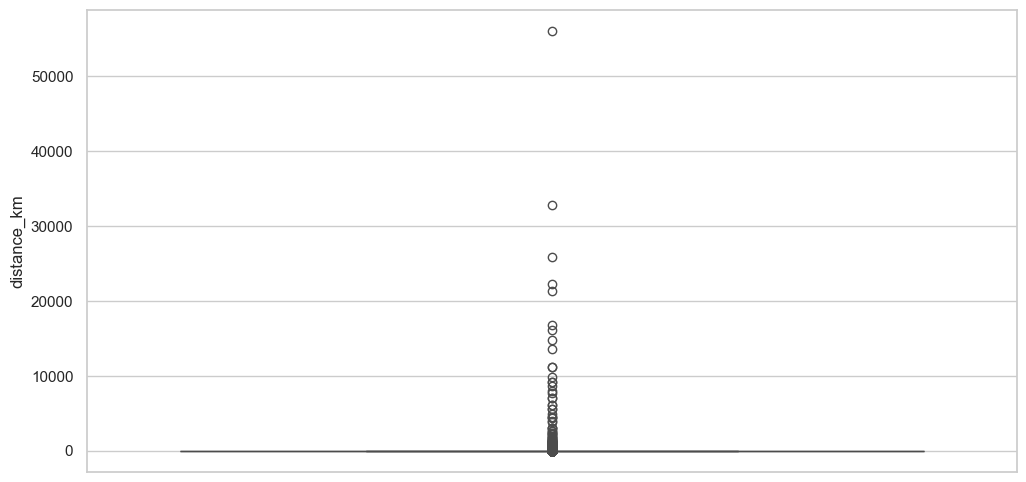

In [21]:
sns.boxplot(df.distance_km)

<Axes: ylabel='travel_time_min'>

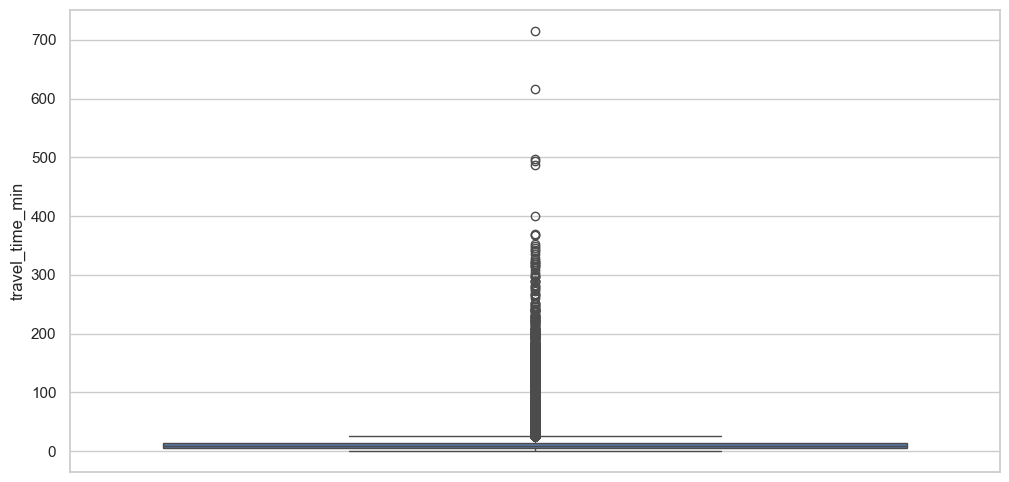

In [22]:
sns.boxplot(df.travel_time_min)

<Axes: ylabel='nominal_price_rub_amt'>

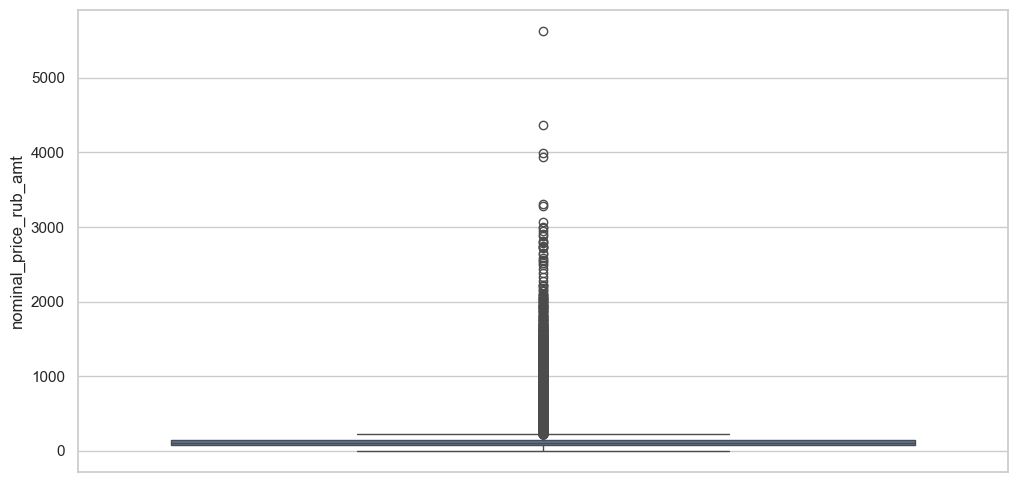

In [23]:
sns.boxplot(df.nominal_price_rub_amt)

обрезай по p99, чтобы не искажать картину.
сгладим наши хвосты

In [24]:
df_clip = df[
    (df["distance_km"] <= df["distance_km"].quantile(0.99)) &
    (df["nominal_price_rub_amt"] <= df["nominal_price_rub_amt"].quantile(0.99)) &
    (df["travel_time_min"] <= df["travel_time_min"].quantile(0.99))
]

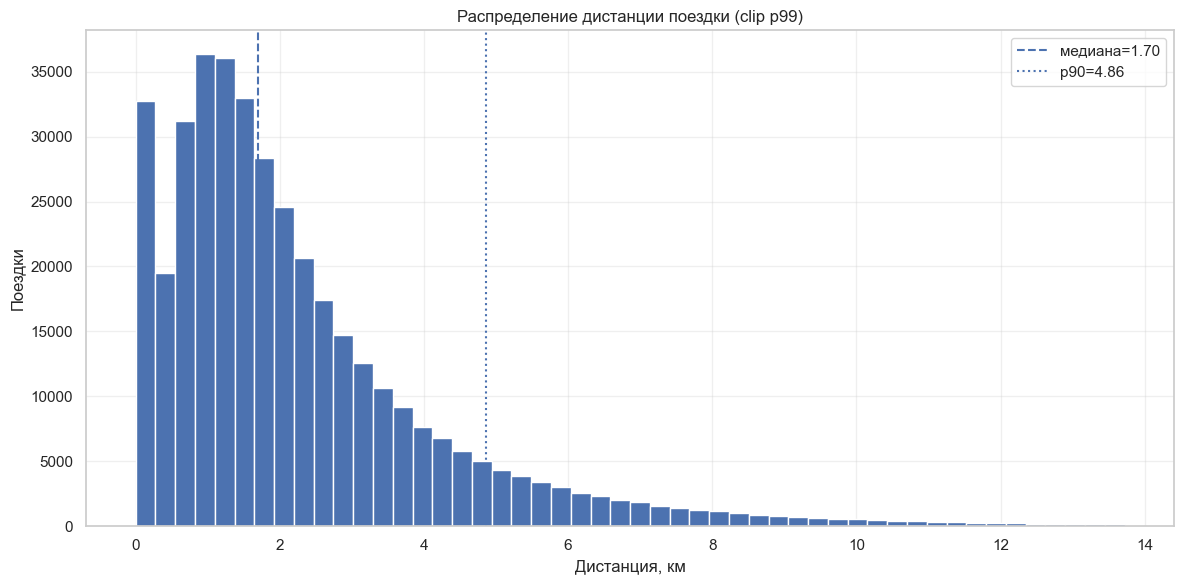

In [25]:
plt.figure(figsize=(12,6))
s = df_clip["distance_km"].dropna()
p50, p90, p99 = s.quantile([.50, .9, .99])
plt.hist(s, bins=50)
plt.title("Распределение дистанции поездки (clip p99)")
plt.xlabel("Дистанция, км"); plt.ylabel("Поездки")
plt.axvline(p50, ls="--", label=f"медиана={p50:.2f}")
plt.axvline(p90, ls=":",  label=f"p90={p90:.2f}")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

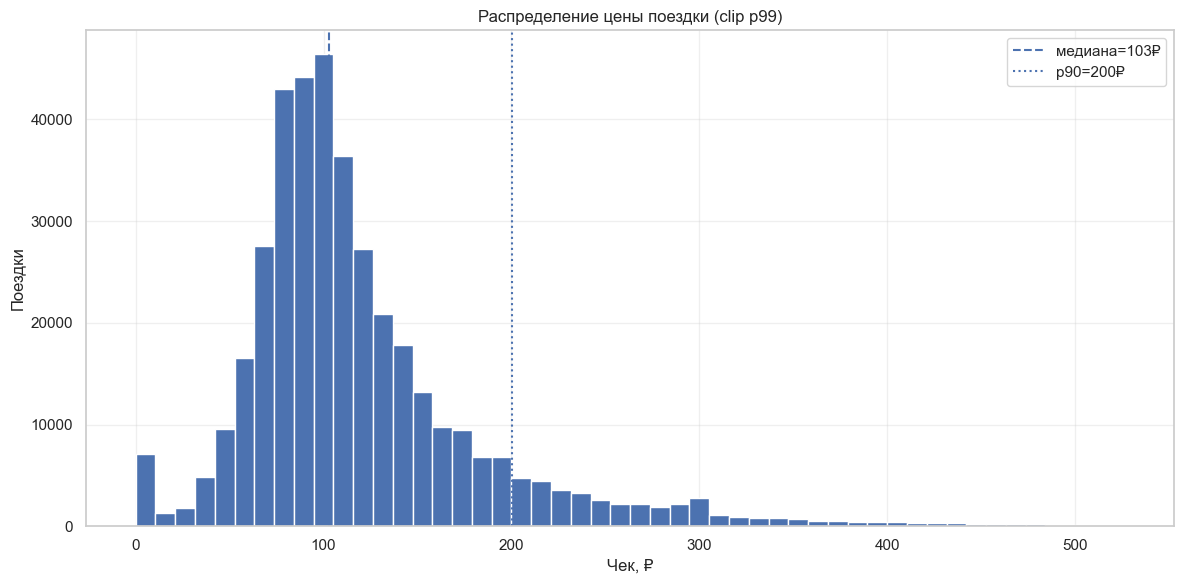

In [26]:
plt.figure(figsize=(12,6))
s = df_clip["nominal_price_rub_amt"].dropna()
p50, p90, p99 = s.quantile([.50, .9, .99])
plt.hist(s, bins=50)
plt.title("Распределение цены поездки (clip p99)")
plt.xlabel("Чек, ₽"); plt.ylabel("Поездки")
plt.axvline(p50, ls="--", label=f"медиана={p50:.0f}₽")
plt.axvline(p90, ls=":",  label=f"p90={p90:.0f}₽")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

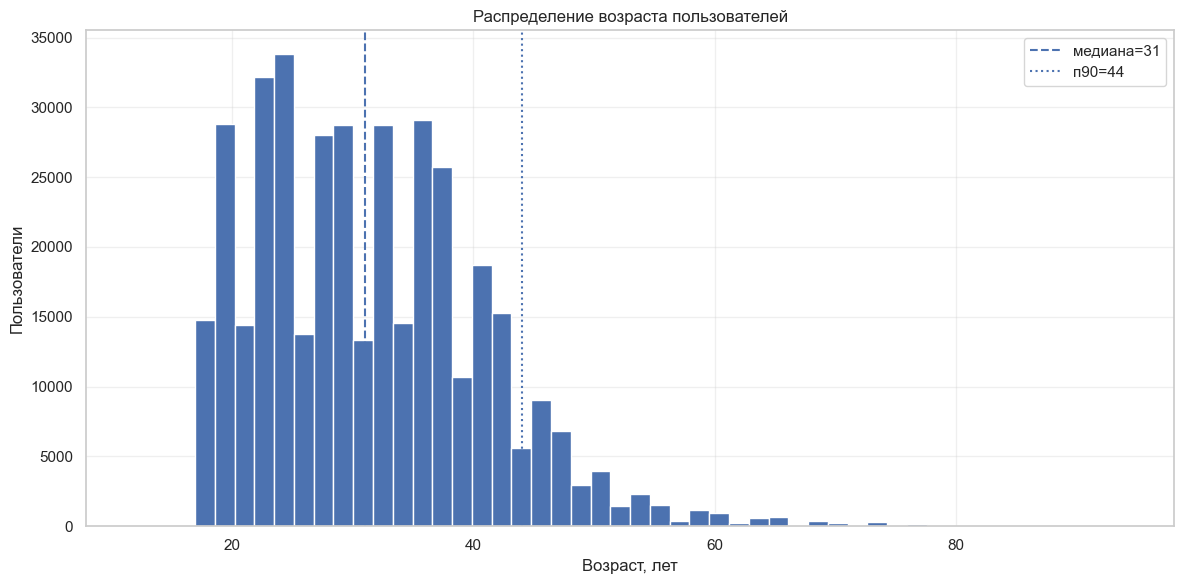

In [27]:
plt.figure(figsize=(12,6))
s = df_clip["age"].dropna()
p50, p90, p99 = s.quantile([.50, .9, .99])
plt.hist(s, bins=50)
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст, лет"); plt.ylabel("Пользователи")
plt.axvline(p50, ls="--", label=f"медиана={p50:.0f}")
plt.axvline(p90, ls=":",  label=f"п90={p90:.0f}")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

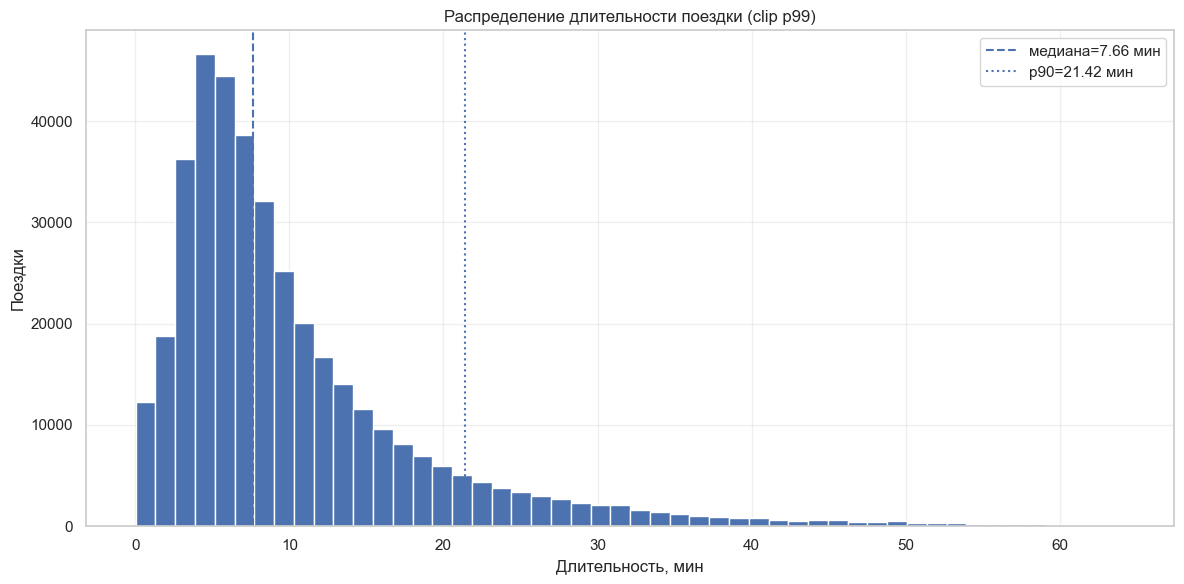

In [28]:
plt.figure(figsize=(12,6))
s = df_clip["travel_time_min"].dropna()
p50, p90, p99 = s.quantile([.50, .9, .99])
plt.hist(s, bins=50)
plt.title("Распределение длительности поездки (clip p99)")
plt.xlabel("Длительность, мин"); plt.ylabel("Поездки")
plt.axvline(p50, ls="--", label=f"медиана={p50:.2f} мин")
plt.axvline(p90, ls=":",  label=f"p90={p90:.2f} мин")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

In [29]:
for col in [ "distance_km", "nominal_price_rub_amt", "age", "travel_time_min"]:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].describe(percentiles=[0.5,0.9,0.99]))


distance_km:
count    396749.000000
mean          3.681031
std         141.862349
min           0.000000
50%           1.729883
90%           5.167259
99%          13.723404
max       56012.640308
Name: distance_km, dtype: float64

nominal_price_rub_amt:
count    396749.000000
mean        127.647694
std         100.122365
min           0.000000
50%         103.940000
90%         211.740000
99%         526.470000
max        5627.640000
Name: nominal_price_rub_amt, dtype: float64

age:
count    396749.000000
mean         31.544006
std           9.434545
min          12.000000
50%          31.000000
90%          44.000000
99%          60.000000
max          94.000000
Name: age, dtype: float64

travel_time_min:
count    396749.000000
mean         11.440989
std          13.174834
min           0.033400
50%           7.768650
90%          23.011288
99%          64.193356
max         715.172206
Name: travel_time_min, dtype: float64


Распределение по полу

Text(0.5, 1.0, 'Распределение по полу')

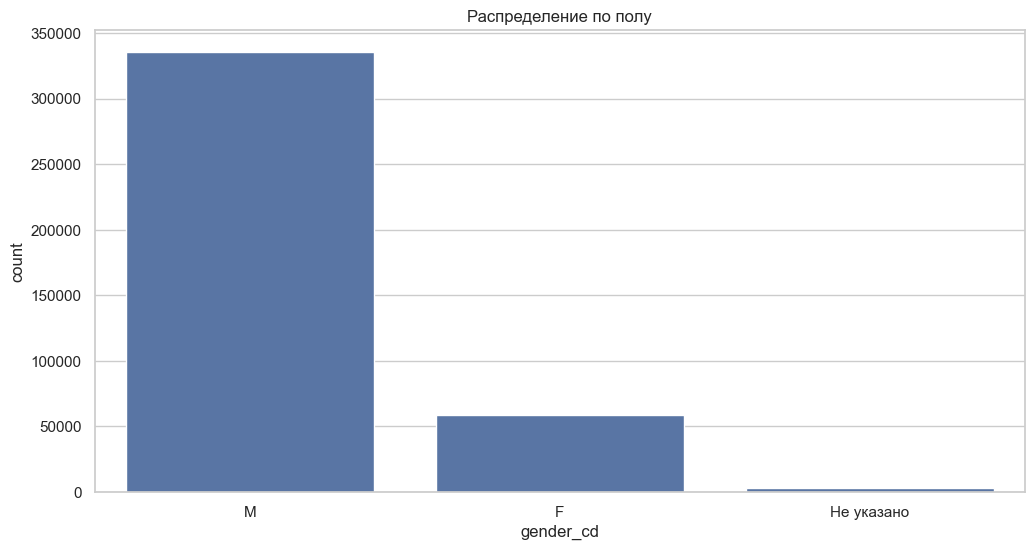

In [30]:
sns.barplot(df['gender_cd'].value_counts())
plt.title("Распределение по полу")

In [31]:
df['gender_cd'].value_counts(normalize=True).mul(100).round(2)

gender_cd
M             84.55
F             14.71
Не указано     0.74
Name: proportion, dtype: float64

В основном проудктом пользубтся мужчины: \
M             84.62% \
F             14.64%

Распределение по регионам

In [32]:
df['lvn_state_nm'].value_counts()

lvn_state_nm
МОСКВА                  93774
МОСКОВСКАЯ ОБЛАСТЬ      41501
САНКТ-ПЕТЕРБУРГ         37912
Не указано              34177
СВЕРДЛОВСКАЯ ОБЛАСТЬ    29434
                        ...  
МОГИЛЁВСКАЯ ОБЛАСТЬ         1
ПОЛЬША                      1
САМАРА                      1
ЗЕЛЕНОГРАД                  1
СОСЕНСКОЕ                   1
Name: count, Length: 104, dtype: int64

Text(0.5, 1.0, 'Распределение по регеонам')

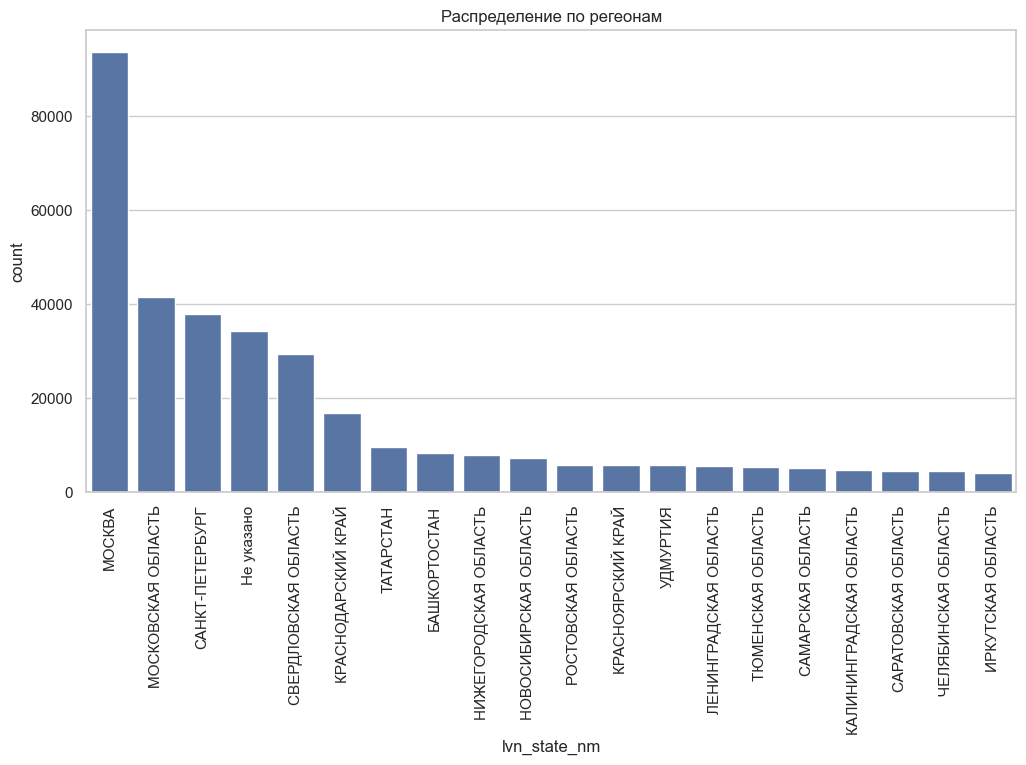

In [33]:
sns.barplot(df['lvn_state_nm'].value_counts().head(20))
plt.xticks(rotation=90)
plt.title("Распределение по регеонам")

In [34]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,travel_time_min
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛАСТЬ,4.99,30.0,300.0,...,3.690479,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,20.500238
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛАСТЬ,8.49,50.0,300.0,...,1.114912,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,6.913893
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛАСТЬ,5.99,30.0,300.0,...,1.515612,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,6.844806
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50.0,300.0,...,0.499411,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,2.309382
4,258647149,238473615,M,34,Не указано,Не указано,МОСКВА,6.99,50.0,300.0,...,2.602028,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,10.090489


количество поездок по времени суток

In [35]:
df['hour'] = df['local_book_start_dttm'].dt.hour

In [36]:
trips_by_hour = df["hour"].value_counts().sort_index()

Text(0, 0.5, 'Поездки')

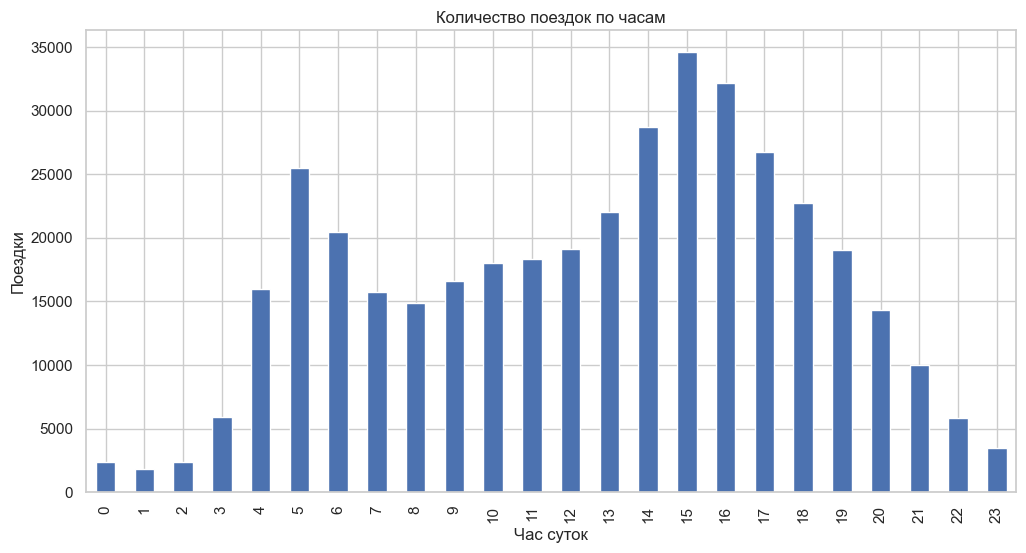

In [37]:
trips_by_hour.plot(kind="bar")
plt.title("Количество поездок по часам")
plt.xlabel("Час суток")
plt.ylabel("Поездки")

Средняя стоимость по времени суток

In [38]:
day_avg_cost = df.groupby("hour", as_index=False).agg({'nominal_price_rub_amt':'median'})
day_avg_cost

,hour,nominal_price_rub_amt
0,0,109.84
1,1,104.90
2,2,97.92
3,3,94.90
4,4,92.45
5,5,95.43
6,6,95.43
7,7,95.85
8,8,99.74
9,9,99.90


<Axes: xlabel='hour', ylabel='nominal_price_rub_amt'>

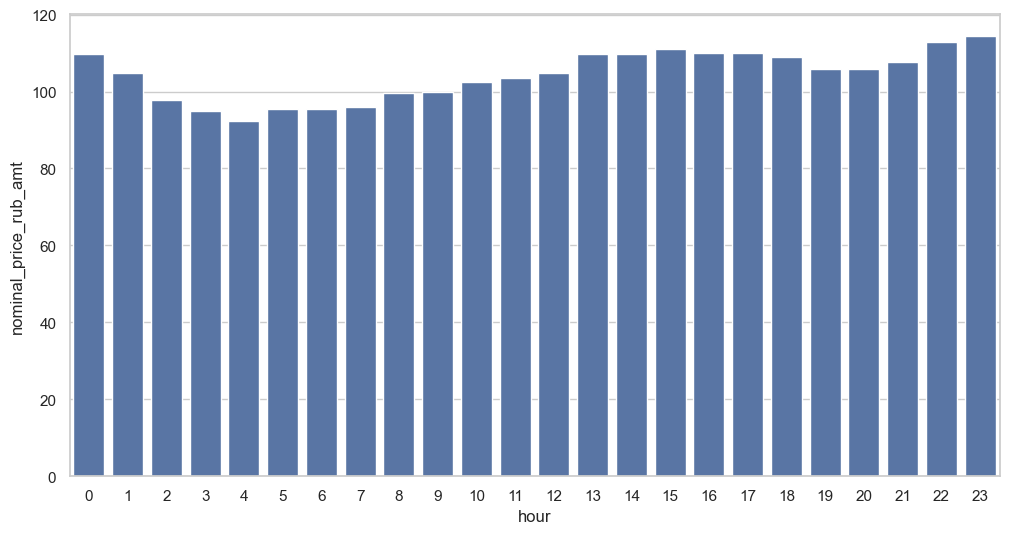

In [39]:
sns.barplot(x='hour', y='nominal_price_rub_amt', data=day_avg_cost)

Кол-во поездок по пользователям и неделям

In [40]:
df["weekday_name"] = df["book_start_dttm"].dt.day_name(locale="Russian")

In [41]:
weekday_size = df.groupby('weekday_name', as_index=False)['order_rk'].size()
weekday_size

,weekday_name,size
0,Воскресенье,48221
1,Вторник,57219
2,Понедельник,55227
3,Пятница,62656
4,Среда,59139
5,Суббота,54622
6,Четверг,59665


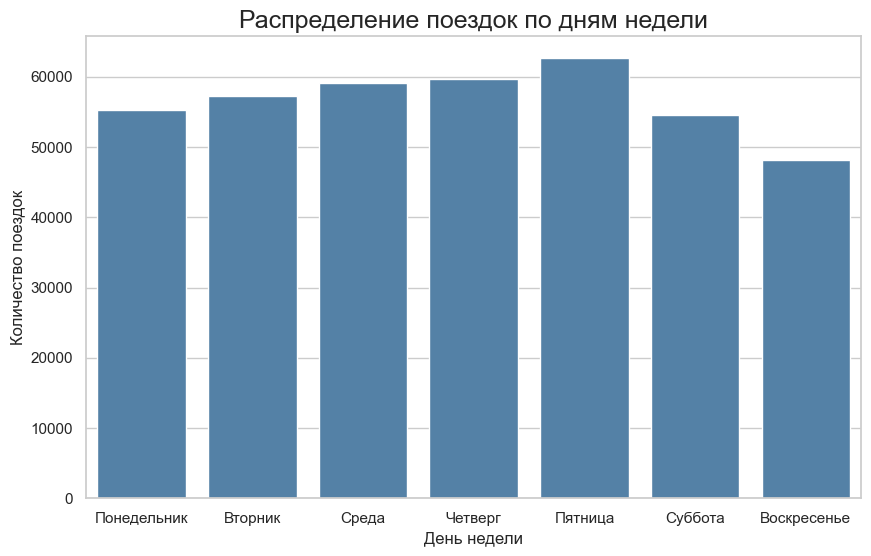

In [42]:
order = ["Понедельник","Вторник","Среда","Четверг","Пятница","Суббота","Воскресенье"]

plt.figure(figsize=(10,6))
sns.barplot(x="weekday_name", y="size", data=weekday_size, order=order, color="steelblue")
plt.title("Распределение поездок по дням недели", fontsize=18)
plt.xlabel("День недели")
plt.ylabel("Количество поездок")
plt.show()

In [43]:
df["week"] = df["local_book_start_dttm"].dt.to_period("W")
rides_per_week = df.groupby(["party_rk", "week"]).size().reset_index(name="rides_per_week")

In [44]:
rides_per_week['rides_per_week'].describe(percentiles=[0.9,0.99])

count    167811.000000
mean          2.364261
std           2.496239
min           1.000000
50%           1.000000
90%           5.000000
99%          13.000000
max          57.000000
Name: rides_per_week, dtype: float64

In [45]:
clients= df.groupby('party_rk', as_index=False).agg({'order_rk':'count', 'travel_time_min':'mean','nominal_price_rub_amt':'sum', 'loyalty_accrual_rub_amt':'sum', 'loyalty_accrual_bns_amt': 'sum'}) \
                    .sort_values(['order_rk', 'travel_time_min'], ascending=False).rename(columns = {'order_rk':'count_trips'})

In [46]:
clients['total_loyalty_accrual'] = clients['loyalty_accrual_rub_amt'] + clients['loyalty_accrual_bns_amt']

In [47]:
clients.head()

,party_rk,count_trips,travel_time_min,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,total_loyalty_accrual
21168,386134592,388,18.636497,55625.29,13348.48,0.0,13348.48
49703,910211081,365,14.027378,48051.32,9124.43,0.0,9124.43
32568,636557947,335,11.813178,35136.13,6702.75,0.0,6702.75
40614,759042976,320,20.863676,54442.24,6070.98,0.0,6070.98
21662,391309281,318,7.066144,31697.50,5838.83,0.0,5838.83


<Axes: xlabel='total_loyalty_accrual', ylabel='Count'>

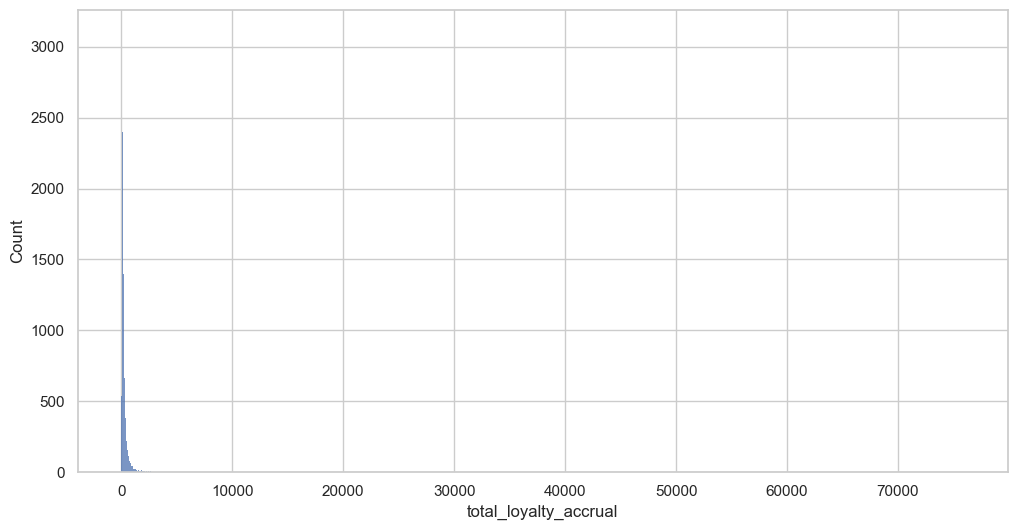

In [48]:
sns.histplot(clients['total_loyalty_accrual'])

Данные очень скошенные, используется логарифмическое преобразование

In [49]:
clients['log_total_loyalty_accrual'] = np.log(clients['total_loyalty_accrual'] + 1)

C:\Users\sp1ts\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
clients = clients.query("log_total_loyalty_accrual > 1")

<Axes: xlabel='log_total_loyalty_accrual', ylabel='Count'>

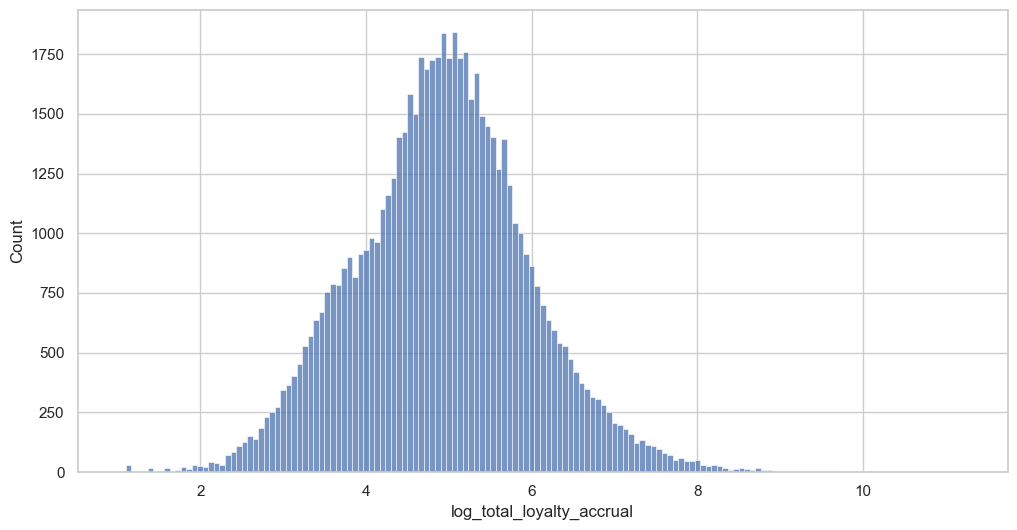

In [51]:
sns.histplot(clients['log_total_loyalty_accrual'])

In [52]:
pg.normality(clients['log_total_loyalty_accrual'], method='normaltest')

,W,pval,normal
log_total_loyalty_accrual,682.151633,7.458560e-149,False


Данные ненормальныею. Используем метод Спирмана

In [53]:
pg.corr(clients['count_trips'], clients['total_loyalty_accrual'], method='spearman')

,n,r,CI95%,p-val,power
spearman,63565,0.500067,"[0.49, 0.51]",0.0,1.0


Корреляция 0.50 указывает на умеренную положительную связь между переменными count_trips и total_loyalty_accrual. Это означает, что увеличение общего начисления кэшбэка связано с кол-вом поездок.

In [54]:
rides_per_week['rides_per_week'].describe(percentiles=[0.9,0.99])

count    167811.000000
mean          2.364261
std           2.496239
min           1.000000
50%           1.000000
90%           5.000000
99%          13.000000
max          57.000000
Name: rides_per_week, dtype: float64

Сформулируем гипотезу: \
**ЕСЛИ увеличить кэшбэк (loyalty_accrual_rub_amt / loyalty_accrual_bns_amt)
НА активных пользователей, делающих 5 и более поездок в неделю
ТО среднее количество поездок на пользователя вырастет
НА 5–7%**

Топ моделей самоката

In [55]:
df["transport_model"].value_counts().head(10)

transport_model
SL              241247
Max              70301
E                67666
Urban E-Bike      4704
ES400             4152
ES200             3325
ES100             2829
MK                1054
ES-08S             911
Techno             228
Name: count, dtype: int64

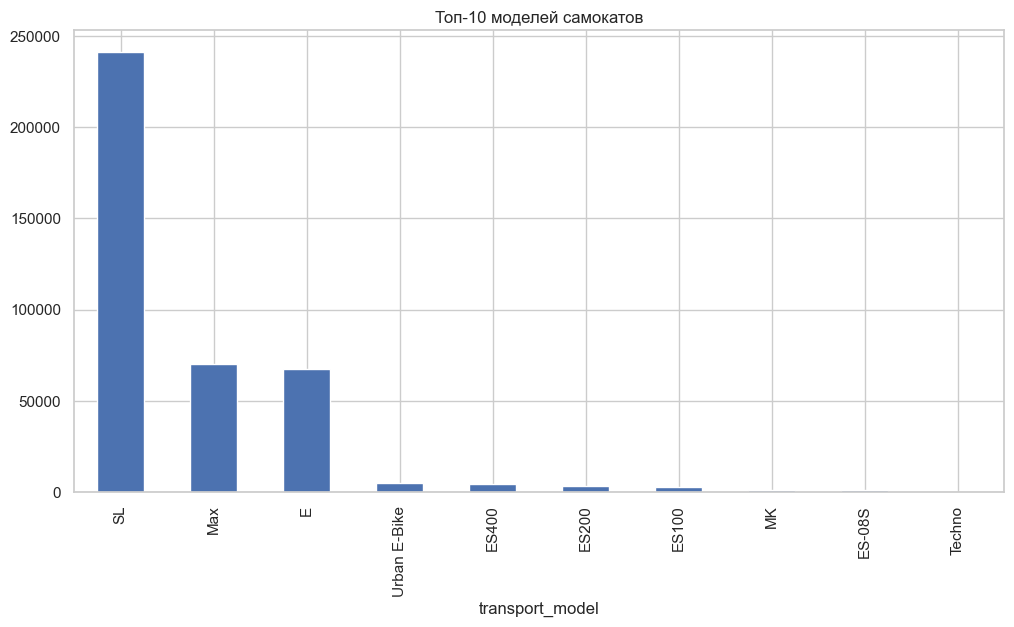

In [56]:
df["transport_model"].value_counts().head(10).plot(kind="bar")
plt.title("Топ-10 моделей самокатов")
plt.show()

Проверим цену активации

In [57]:
df['activation_cost'].value_counts()

activation_cost
50.0    259678
30.0     89069
40.0     17559
0.0      15060
35.0     13015
45.0      1535
20.0       708
15.0       108
5.0         12
10.0         5
Name: count, dtype: int64

In [58]:
num_df = df[['activation_cost', 'age', 'minute_cost','distance_km','book_time_zone_cd']]
corr_matrix = num_df.corr(method='spearman')
corr_matrix

,activation_cost,age,minute_cost,distance_km,book_time_zone_cd
activation_cost,1.000000,0.093364,0.484613,-0.031518,-0.556704
age,0.093364,1.000000,0.072184,0.001976,-0.091894
minute_cost,0.484613,0.072184,1.000000,-0.057363,-0.435156
distance_km,-0.031518,0.001976,-0.057363,1.000000,0.011736
book_time_zone_cd,-0.556704,-0.091894,-0.435156,0.011736,1.000000


In [59]:
# Сортируем по времени
df = df.sort_values(["party_rk", "book_start_dttm"])
# Номер поездки для каждого пользователя
df["ride_number"] = df.groupby("party_rk").cumcount() + 1
# Флаг "первая поездка"
df["is_first_ride"] = (df["ride_number"] == 1).astype(int)

In [60]:
df[["activation_cost", "is_first_ride"]].corr(method='spearman')

,activation_cost,is_first_ride
activation_cost,1.000000,-0.044651
is_first_ride,-0.044651,1.000000


minute_cost = +0.48.
Значит, активация связана с тарифом: чем выше поминутная цена, тем выше фиксированная стоимость старта.\
также видим и book_time_zone_cd = -0.55

Сформулируем гипотезу: \
**ЕСЛИ сделать активацию бесплатной (activation_cost = 0)
НА новых пользователей в первые 2 поездки
ТО конверсия в старт поездки возрастёт
НА 5–10%**

### Основные выводы: 
Типичная поездка: 1.7 км, 11 мин, 104 ₽. \
90% поездок: до 5 км, до 23 мин, до 212 ₽.


**Поездки по дням недели (у тебя в графике):**

Пятница — пик (≈62k).

Вторник, Четверг, Среда — 57–59k.

Понедельник, Суббота — чуть меньше (54–55k).

Воскресенье — минимум (≈48k).

**Распределение поездок по времени суток:**

Поездки резко возрастают с 5 утра.

Утренний пик: 10-11 часов.

Основной пик: 14–18 часов.

После 20:00 спрос падает, минимумы — ночью (0–3).

In [61]:
df.columns

Index(['order_rk', 'party_rk', 'gender_cd', 'age', 'education_level_cd',
       'marital_status_cd', 'lvn_state_nm', 'minute_cost', 'activation_cost',
       'hold_amount', 'transport_model', 'distance_km', 'created_dttm',
       'book_start_dttm', 'book_end_dttm', 'book_time_zone_cd',
       'local_book_start_dttm', 'nominal_price_rub_amt',
       'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt', 'travel_time_min',
       'hour', 'weekday_name', 'week', 'ride_number', 'is_first_ride'],
      dtype='object')

Доля рынка

In [62]:
df['order_rk'].count()

396749

In [63]:
df['nominal_price_rub_amt'].sum()

50644095.02